# Rejection Sampling for Bi-Modal Gaussian Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy.stats import norm, uniform
from scipy.stats import multivariate_normal

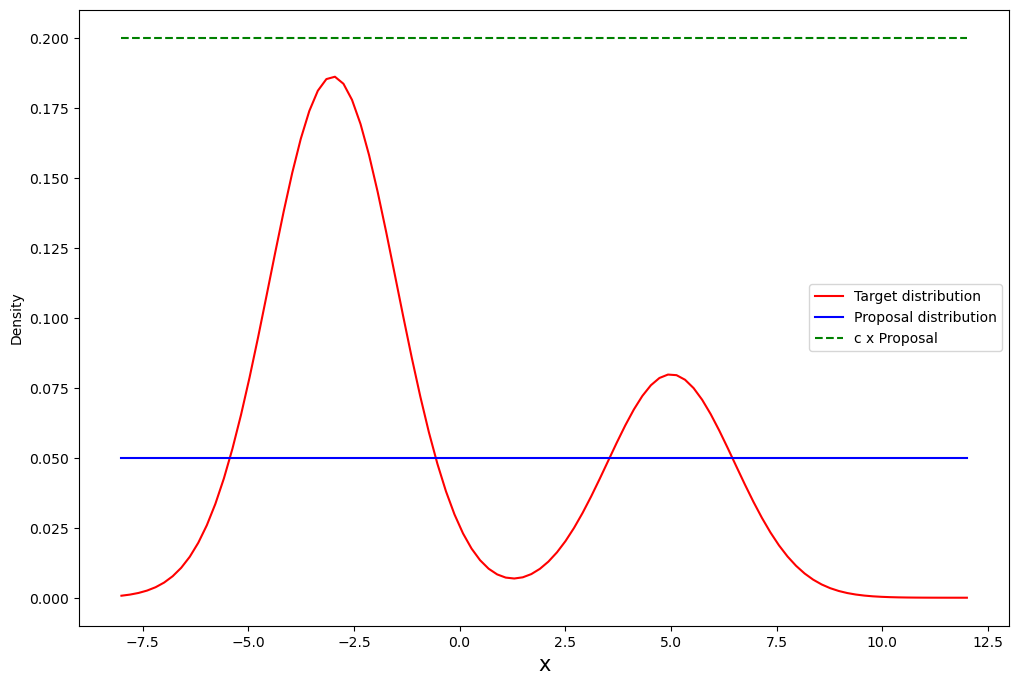

In [4]:
# Target distribution
def p(x):
    return 0.7 * norm.pdf(x, -3, 1.5) + 0.3 * norm.pdf(x, 5, 1.5)

xMin, xMax = -8, 12
nbins = 100
xRange = np.linspace(xMin, xMax, nbins)

# Proposal distribution
select_dist = int(input('[1] Uniform distribution, [2] Gaussian distribution => '))
if select_dist == 1:
    def q(x):
        return uniform(loc = xMin, scale = (xMax - xMin)).pdf(x)
elif select_dist == 2:
    def q(x):
        return norm(loc = 0, scale = (xMax - xMin)/6).pdf(x)

plt.figure(figsize = (12, 8))
plt.plot(xRange, p(xRange), 'r-', label = 'Target distribution')
plt.plot(xRange, q(xRange), 'b-', label = 'Proposal distribution')
if select_dist == 1:
    M_int = np.ceil(np.max(p(xRange)) / np.max(q(xRange)))
else:
    M_int = np.ceil(np.max(p(xRange)) / q(xRange))

plt.plot(xRange, M_int * q(xRange), 'g--', label = 'c x Proposal')
plt.xlabel('x', fontsize = 15)
plt.ylabel('Density')
plt.legend()
plt.show()

In [5]:
N = 10000
acceptX, acceptU = [], []
rejectX, rejectU = [], []
num_accept_samples, num_reject_samples = 0, 0

while (num_accept_samples < N):
    if select_dist == 1:
        x0 = np.random.uniform(xMin, xMax)
    elif select_dist == 2:
        x0 = np.random.normal(loc = 0, scale = (xMax - xMin)/6)

    u = np.random.uniform(0, 1)
    ratio = p(x0) / ( M_int * q(x0) )
    if u < ratio:
        acceptX.append(x0)
        acceptU.append(u)
        num_accept_samples += 1
    else:
        rejectX.append(x0)
        rejectU.append(u)
        num_reject_samples += 1

acceptX = np.transpose(acceptX)
acceptU = np.transpose(acceptU)
rejectX = np.transpose(rejectX)
rejectU = np.transpose(rejectU)
accept_rate = num_accept_samples / (num_accept_samples + num_reject_samples)

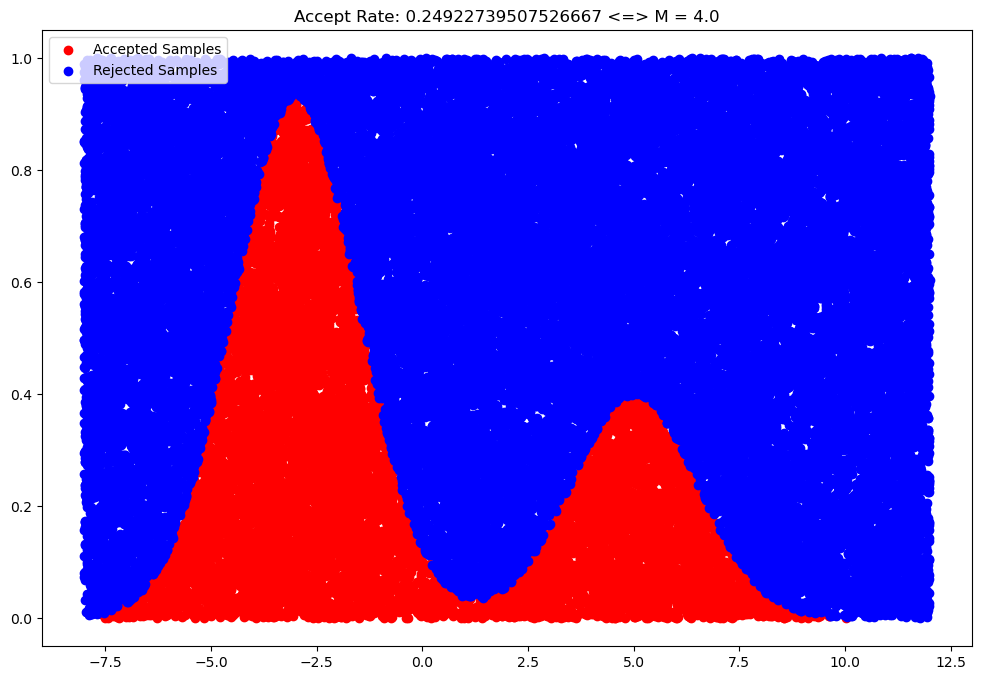

In [6]:
plt.figure(figsize = (12, 8))
plt.scatter(acceptX, acceptU, color = 'r', label = 'Accepted Samples')
plt.scatter(rejectX, rejectU, color = 'b', label = 'Rejected Samples')

plt.title('Accept Rate: ' + str(accept_rate) + ' <=> M = ' + str(M_int))
plt.legend()
plt.show()

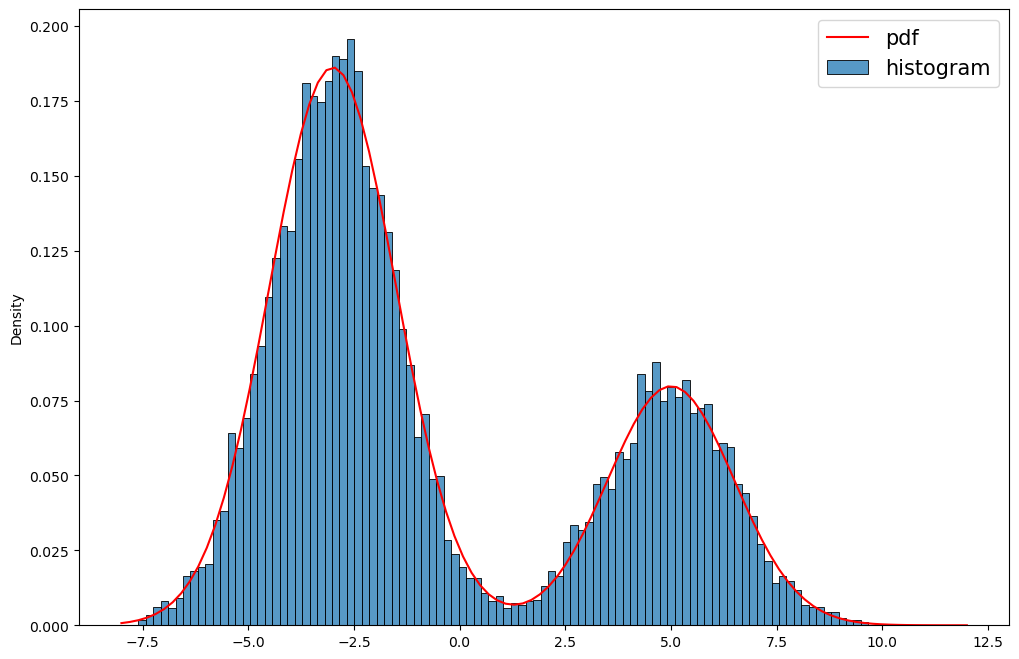

In [7]:
plt.figure(figsize = (12, 8))
sns.histplot(data = acceptX, stat='density', bins=nbins)
plt.plot(xRange, p(xRange), 'r-')
plt.legend(['pdf', 'histogram'], fontsize=15)
plt.show()